#### Libraries Installation


In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
#matplotlib for figures, inline >> print more beautifully figures

### Read Data and Data exploration

In [ ]:
#Read Data with Pandas
train_data = pd.read_csv('./flight_delay.csv')

In [ ]:
#Data exploration
print(train_data.columns) #Columns of train data
print(train_data.shape) #size of train data

Index(['Depature Airport', 'Scheduled depature time', 'Destination Airport',
       'Scheduled arrival time', 'Delay'],
      dtype='object')
(675513, 5)


In [ ]:
train_data.head(5)

,Depature Airport,Scheduled depature time,Destination Airport,Scheduled arrival time,Delay
0,SVO,2015-10-27 07:40:00,HAV,2015-10-27 20:45:00,0.0
1,SVO,2015-10-27 09:50:00,JFK,2015-10-27 20:35:00,2.0
2,SVO,2015-10-27 10:45:00,MIA,2015-10-27 23:35:00,0.0
3,SVO,2015-10-27 12:30:00,LAX,2015-10-28 01:20:00,0.0
4,OTP,2015-10-27 14:15:00,SVO,2015-10-27 16:40:00,9.0


In [ ]:
#Calculating Flight Duration Column 
train_data['Scheduled depature time'] = pd.to_datetime(train_data['Scheduled depature time'])
train_data['Scheduled arrival time'] = pd.to_datetime(train_data['Scheduled arrival time'])
train_data['Flight Duration'] = (train_data['Scheduled arrival time'] - train_data['Scheduled depature time']).dt.total_seconds()/60
train_data.head(5)

,Depature Airport,Scheduled depature time,Destination Airport,Scheduled arrival time,Delay,Flight Duration
0,SVO,2015-10-27 07:40:00,HAV,2015-10-27 20:45:00,0.0,785.0
1,SVO,2015-10-27 09:50:00,JFK,2015-10-27 20:35:00,2.0,645.0
2,SVO,2015-10-27 10:45:00,MIA,2015-10-27 23:35:00,0.0,770.0
3,SVO,2015-10-27 12:30:00,LAX,2015-10-28 01:20:00,0.0,770.0
4,OTP,2015-10-27 14:15:00,SVO,2015-10-27 16:40:00,9.0,145.0


In [ ]:
#statistics about data, count, unique, top, freq
train_data.describe()

,Delay,Flight Duration
count,675513.000000,675513.000000
mean,9.912939,196.035351
std,44.895875,121.853260
min,0.000000,45.000000
25%,0.000000,120.000000
50%,0.000000,160.000000
75%,5.000000,225.000000
max,1436.000000,1590.000000


### Trainset splitting and Reset Index 

In [ ]:
train_data.rename(columns = {'Scheduled depature time': 'Scheduled_depature_time'}, inplace = True)
ts = pd.to_datetime('1/1/2018')
train_data['Scheduled_depature_time']  = pd.to_datetime(train_data.Scheduled_depature_time)
train_set = train_data.loc[train_data.Scheduled_depature_time < ts,:]
test_set = train_data.loc[train_data.Scheduled_depature_time > ts,:]

def reset_index(df):
  df = pd.DataFrame(df)
  df = df.reset_index()
  df = df.drop('index', axis=1)
  return df

train_set = reset_index(train_set)
test_set = reset_index(test_set)

In [ ]:
train_set.tail(5)

,Depature Airport,Scheduled_depature_time,Destination Airport,Scheduled arrival time,Delay,Flight Duration
499057,SVO,2017-12-31 22:50:00,MLE,2018-01-01 07:35:00,0.0,525.0
499058,JFK,2017-12-31 22:20:00,SVO,2018-01-01 07:10:00,213.0,530.0
499059,SVO,2017-12-31 13:50:00,VOZ,2017-12-31 15:05:00,1242.0,75.0
499060,SVO,2017-12-31 15:10:00,EGO,2017-12-31 16:35:00,1142.0,85.0
499061,OVB,2017-12-31 14:30:00,SVO,2017-12-31 19:00:00,478.0,270.0


In [ ]:
test_set.head(5)

,Depature Airport,Scheduled_depature_time,Destination Airport,Scheduled arrival time,Delay,Flight Duration
0,ATH,2018-01-01 01:20:00,SVO,2018-01-01 05:30:00,0.0,250.0
1,LHR,2018-01-01 01:30:00,SVO,2018-01-01 05:05:00,0.0,215.0
2,DXB,2018-01-01 01:35:00,SVO,2018-01-01 07:15:00,0.0,340.0
3,TLV,2018-01-01 02:00:00,SVO,2018-01-01 06:10:00,1.0,250.0
4,BEY,2018-01-01 02:05:00,SVO,2018-01-01 06:00:00,0.0,235.0


In [ ]:
x_train = train_set.drop(['Scheduled_depature_time','Scheduled arrival time','Delay'], axis=1)
x_test = test_set.drop(['Scheduled_depature_time','Scheduled arrival time','Delay'], axis=1)
y_train = train_set['Delay']
y_test = test_set['Delay']

In [ ]:
#display last 5 elements in x_train to make sure that they all are in 2017. 
x_train.tail(5)

,Depature Airport,Destination Airport,Flight Duration
499057,SVO,MLE,525.0
499058,JFK,SVO,530.0
499059,SVO,VOZ,75.0
499060,SVO,EGO,85.0
499061,OVB,SVO,270.0


In [ ]:
#display first 5 elements in x_test to make sure that they all are in 2018. 
x_test.head(5)

,Depature Airport,Destination Airport,Flight Duration
0,ATH,SVO,250.0
1,LHR,SVO,215.0
2,DXB,SVO,340.0
3,TLV,SVO,250.0
4,BEY,SVO,235.0


### One-hot-encoding of categorical feature

In [ ]:
#check types of x_train, types could be categorical or numerical
types = x_train.dtypes
print("Number categorical features:", sum(types=='object'))
print(types)

Number categorical features: 2
Depature Airport        object
Destination Airport     object
Flight Duration        float64
dtype: object


In [ ]:
print("Encoding Categorical Features\n")
from sklearn.preprocessing import OneHotEncoder

print(f'before encoding: x_train size {x_train.shape} and x_test size {x_test.shape}')

def ohe_new_features(df, features_name, encoder):
    new_feats = encoder.transform(df[features_name])
    #create dataframe from encoded features with named columns
    new_cols = pd.DataFrame(new_feats, dtype=int, columns=encoder.get_feature_names(features_name))
    new_df = pd.concat([df, new_cols], axis=1)   
    new_df.drop(features_name, axis=1, inplace=True)
    return new_df

encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
f_names = ['Depature Airport', 'Destination Airport']
encoder.fit(x_train[f_names])
x_train = ohe_new_features(x_train, f_names, encoder)
x_test = ohe_new_features(x_test, f_names, encoder)
print(f'after encoding: x_train size {x_train.shape} and x_test size {x_test.shape}')

Encoding Categorical Features

before encoding: x_train size (499062, 3) and x_test size (176451, 3)
after encoding: x_train size (499062, 337) and x_test size (176451, 337)


In [ ]:
type(x_train),type(y_train),type(x_test),type(y_test)

(pandas.core.frame.DataFrame,
 pandas.core.series.Series,
 pandas.core.frame.DataFrame,
 pandas.core.series.Series)

### Data Imputation
There is no need for imputation as there are no missing values as shown below.

In [ ]:
def count_nans(df):
    return np.sum(np.sum(np.isnan(df)))

print(f'Number of missing values in x_train, x_test: {count_nans(x_train.shape)} , {count_nans(x_test)} \nthere is no need for imputation')

Number of missing values in x_train, x_test: 0 , 0 
there is no need for imputation


### Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
type(x_train),type(y_train),type(x_test),type(y_test)

(numpy.ndarray,
 pandas.core.series.Series,
 numpy.ndarray,
 pandas.core.series.Series)

### Data Visualization


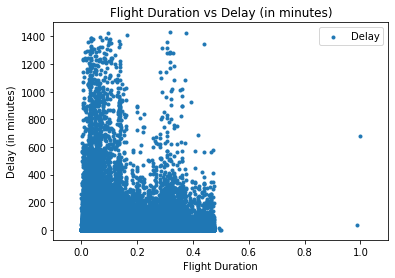

In [ ]:
Flight_Duration = x_train[:,0].reshape(-1,1)
x_test = x_test[:,0].reshape(-1,1)
plt.scatter(Flight_Duration, y_train, marker='.', label="Delay")
plt.title('Flight Duration vs Delay (in minutes)')
plt.xlabel('Flight Duration')
plt.ylabel('Delay (in minutes)')
plt.legend(loc="upper right")
plt.xlim([-0.1, 1.1])
plt.show()

### Outlier Detection & Removal

Outlier Detection & Removal

Before OutLier Removal : x_train size (499062, 1) and y_train size (499062,)
After OutLier Removal : x_train size (499036, 1) and y_train size (499036,)
26 data point have been identified as outliers


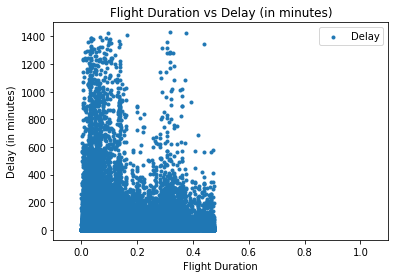

In [ ]:
print('Outlier Detection & Removal\n')
from sklearn.neighbors import LocalOutlierFactor
print(f'Before OutLier Removal : x_train size {Flight_Duration.shape} and y_train size {y_train.shape}')
lof = LocalOutlierFactor()
yhat = lof.fit_predict(Flight_Duration)
#select all rows that are not outliers
mask = yhat != -1
Flight_Duration, y_train = Flight_Duration[mask, :], y_train[mask]
print(f'After OutLier Removal : x_train size {Flight_Duration.shape} and y_train size {y_train.shape}')
print(f'{np.sum(yhat == -1)} data point have been identified as outliers')
plt.scatter(Flight_Duration, y_train, marker='.', label="Delay")
plt.title('Flight Duration vs Delay (in minutes)')
plt.xlabel('Flight Duration')
plt.ylabel('Delay (in minutes)')
plt.legend(loc="upper right")
plt.xlim([-0.1, 1.1])
plt.show()

## 1. Linear Regression

In this regression task we will predict the flight delay in minutes based upon flight duration.
<br>
<center><b>Simple Linear Regression Equation</b></center>
$$y = \beta_0 + \beta_1x_1 $$

In [ ]:
print("Linear Regression Model\n")
#Build, Train, and Test Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
regressor = LinearRegression()
regressor.fit(Flight_Duration, y_train) #uses Gradient Descent

print(f"LR Model intercept : {regressor.intercept_}")
print(f"LR Model coefficient : {regressor.coef_}\n")
y_TRe1 = regressor.predict(Flight_Duration) 
y_pred1 = regressor.predict(x_test) 
eval_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred1})
print(eval_df)

#Evaluate model Training error and Test error
print('\nTrain error')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_TRe1))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_TRe1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_TRe1)))
print('Coefficient of Determination R score:', metrics.r2_score(y_train, y_TRe1))
print('\nTest error')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))
print('Coefficient of Determination R score:', metrics.r2_score(y_test, y_pred1))

Linear Regression Model

LR Model intercept : 8.804765154662833
LR Model coefficient : [25.13030736]

        Actual  Predicted
0          0.0  11.997215
1          0.0  11.424211
2          0.0  13.470653
3          1.0  11.997215
4          0.0  11.751642
...        ...        ...
176446     0.0  10.196346
176447     0.0   9.214054
176448     0.0   9.295911
176449     0.0  11.178638
176450   379.0  13.470653

[176451 rows x 2 columns]

Train error
Mean Absolute Error: 15.41618604929478
Mean Squared Error: 2150.5407163333775
Root Mean Squared Error: 46.37392280510004
Coefficient of Determination R score: 0.0018828529642611613

Test error
Mean Absolute Error: 14.400233690195993
Mean Squared Error: 1619.1917417258996
Root Mean Squared Error: 40.239181673164026
Coefficient of Determination R score: -0.010244818595628313


### 2. Polynomial Regression


Polynomial Regression Model

For degree 10
Cross Validation MSE: 2150.9903507333256 and std: 481.11865416382335
Train error
Mean Absolute Error: 15.42874919773324
Mean Squared Error: 2148.2128344049916
Root Mean Squared Error: 46.34881696877485
Coefficient of Determination R score: 0.002963278389992219
Test error
Mean Absolute Error: 14.401240910311982
Mean Squared Error: 1618.2794325493533
Root Mean Squared Error: 40.22784399578671
Coefficient of Determination R score: -0.009675611382663485


For degree 15
Cross Validation MSE: 2150.830795357931 and std: 481.19326370628335
Train error
Mean Absolute Error: 15.42137402970501
Mean Squared Error: 2147.9128846665662
Root Mean Squared Error: 46.34558106946731
Coefficient of Determination R score: 0.003102492204870244
Test error
Mean Absolute Error: 14.39490296068346
Mean Squared Error: 1618.1770388531625
Root Mean Squared Error: 40.22657130371867
Coefficient of Determination R score: -0.009611725989496112


For degree 20
Cross Validation MS

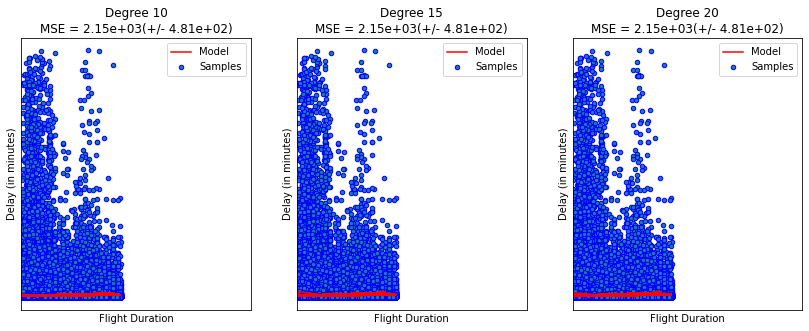

In [ ]:
print('Polynomial Regression Model\n')
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures #to convert the original features into their higher order terms 
from sklearn.model_selection import cross_val_score

degrees = [10,15,20]
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i])
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                          ("linear_regression", linear_regression)])
    #pipeline is to assemble several steps that can be cross-validated together while setting different parameters. 

    pipeline.fit(Flight_Duration.flatten()[:, np.newaxis], y_train) #flatten a matrix to one dimension.

    
    y_TRe2 = pipeline.predict(Flight_Duration)
    y_pred2 = pipeline.predict(x_test)

    #Evaluate the models using cross validation and evaluate model Training error and Test error
    scores = cross_val_score(pipeline, Flight_Duration.flatten()[:, np.newaxis], y_train,scoring="neg_mean_squared_error", cv=7)
    
    print(f'For degree {degrees[i]}')
    print(f'Cross Validation MSE: {-scores.mean()} and std: {scores.std()}')
    print('Train error')
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_TRe2))
    print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_TRe2))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_TRe2)))
    print('Coefficient of Determination R score:', metrics.r2_score(y_train, y_TRe2))
    print('Test error')
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred2))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred2))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))
    print('Coefficient of Determination R score:', metrics.r2_score(y_test, y_pred2))
    print('\n')
    plt.plot(x_test, pipeline.predict(x_test.flatten()[:, np.newaxis]),'r', label="Model")
    plt.scatter(Flight_Duration, y_train, edgecolor='b', s=20, label="Samples")
    plt.xlabel('Flight Duration')
    plt.ylabel('Delay (in minutes)')
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))
    plt.xlim([0, 1.1])
plt.show()

### 3. Regularization : Lasso 

Regularization : Lasso Model



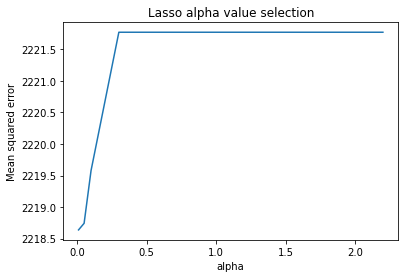

Best value of alpha: 0.01
Train error
Mean Absolute Error: 15.390032406530523
Mean Squared Error: 2142.9852078354625
Root Mean Squared Error: 46.29238822782275
Coefficient of Determination R score: 0.0019321771988336511
Test error
Mean Absolute Error: 14.393394770180794
Mean Squared Error: 1619.1305471497467
Root Mean Squared Error: 40.23842128053419
Coefficient of Determination R score: -0.010206638124537815


In [ ]:
print('Regularization : Lasso Model\n')
from sklearn.linear_model import Lasso, Ridge
lasso = Lasso()
from sklearn.model_selection import train_test_split
#split x_train to x_train set and validation set in order to tune the hyperparameter alpha
X, y = Flight_Duration, y_train
X, x_val, y, y_val = train_test_split(X, y, test_size=0.1, random_state=123)
alphas = [2.2, 2, 1.5, 1.1, 1, 0.3, 0.1,0.05,0.01] #random variables to select the one with the min error.
losses = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X, y)
    y_pred3 = lasso.predict(x_val)
    mse = metrics.mean_squared_error(y_val, y_pred3)
    losses.append(mse)
plt.plot(alphas, losses)
plt.title("Lasso alpha value selection")
plt.xlabel("alpha")
plt.ylabel("Mean squared error")
plt.show()

best_alpha = alphas[np.argmin(losses)]
print("Best value of alpha:", best_alpha)

lasso = Lasso(best_alpha)
lasso.fit(X, y)
y_TRe3 = lasso.predict(X)
y_pred3 = lasso.predict(x_test)

print('Train error')
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_TRe3))
print('Mean Squared Error:', metrics.mean_squared_error(y, y_TRe3))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_TRe3)))
print('Coefficient of Determination R score:', metrics.r2_score(y, y_TRe3))
print('Test error')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred3))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred3))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))
print('Coefficient of Determination R score:', metrics.r2_score(y_test, y_pred3))